<center><strong><h1>Universidade Federal de Alagoas</h1></strong></center>
<center><strong><h1>IC - Instituto de Computação</h1></strong></center>
<center><strong><h2>Sistemas de Controle II - 2022.1</h2></strong></center>

---

**Professor**: Ícaro Araújo

---

<center><strong><h2>Exemplo didático I</h2></strong></center>

### Descrição do sistema

O sistema a ser estudado é o circuito $RLC$ apresentado abaixo:

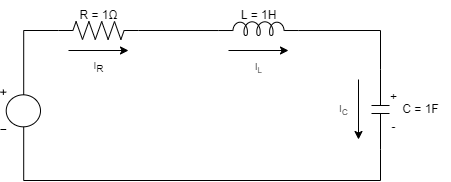

Serão assumidas as seguintes constantes para o circuito:

\begin{equation}
R = 1Ω
\end{equation}

\begin{equation}
L = 1H
\end{equation}

\begin{equation}
C = 1F
\end{equation}

De forma que a entrada do sistema $v_i$ é a tensão fornecida pela fonte e a saída observada é o valor $v_c$ presente em $C$.

### Modelagem do Sistema:

Se tratando de um sistema elétrico, podemos partir dos elementos armazenadores de energia para montar a matriz de estados $x$. Usaremos a corrente presente em $L$ e a tensão presente em $C$. Lembrando que:

\begin{equation}
\frac{di_L}{dt} = \frac{1}{L} \cdot v_L ;
\frac{dv_C}{dt} = \frac{1}{C} \cdot i_C
\end{equation}

Logo:

\begin{equation}
  x =
  \begin{bmatrix}
    i_L \\
    v_c
  \end{bmatrix}
  →
  \dot{x} =
  \begin{bmatrix}
    v_L \\
    i_C
  \end{bmatrix}
\end{equation}

Em seguida, precisamos escrever os elementos presentes em $\dot{x}$ em função das variáveis de estados presentes em $x$. Para isso, faremos uso das Leis de Kirchhoff. Dessa forma temos as seguintes relações:

\begin{equation}
  v_i = R\cdot i_R + v_L + v_c
\end{equation}

\begin{equation}
  v_c = \frac{1}{C} \int i_c(t) dt → \frac{dv_c}{dt} ⋅ i_c
\end{equation}

Sabendo que:

\begin{equation}
  i_R = i_L = i_C
\end{equation}

Temos por fim:

\begin{equation}
   S = \left\{\begin{matrix}
\dot{x_1}= & -1x_1 & -1x_2 & +1u\\ 
\dot{x_2}= &  1x_1 & +0x_2 & +0u
\end{matrix}\right.
\end{equation}

Usando o que foi descrito acima, podemos escrever no formato:

\begin{equation}
   \left\{\begin{matrix}
\dot{x} = & Ax + Bu\\ 
y= &  Cx + Du
\end{matrix}\right.
\end{equation}

Portanto:

\begin{equation}
\dot{x} = \begin{bmatrix}
 -1& -1\\ 
  1 & 0 
\end{bmatrix}
⋅ x + \begin{bmatrix}
  1\\ 
  0 
\end{bmatrix}
⋅ u
\end{equation}

\begin{equation}
y = \begin{bmatrix} 
  0 & 1 
\end{bmatrix}
⋅ x + \begin{bmatrix} 
  0 
\end{bmatrix}
⋅ u
\end{equation}

Uma vez que o sistema foi modelado e as matrizes $A$, $B$, $C$ e $D$ foram definidas podemos fazer uso do $Python$ para realizar a análize do mesmo.






### Imports das $\textit{toolbox}$ necessárias 

In [ ]:
pip install control

In [ ]:
import control as ctr
from control.matlab import *
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
from numpy.linalg import eigvals
import numpy as np

### Definição das matrizes do sistema

In [ ]:
##Sistema em E.E. Modelado

A = [[-1,-1],[1,0]]
B = [[1],[0]]
C = [0,1]
D = [0]

system = ss(A,B,C,D)
print('\033[1m'+'Matrizes do sistema:'+'\033[0m\n')
print(system)

Matrizes do sistema:

<LinearIOSystem>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-1. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[0. 1.]]

D = [[0.]]



###Função de transferência equivalente

Temos que a f.t. equivalente pode ser calculada manualmente utilizando o seguinte modelo:

\begin{equation}
G(s) = C⋅(s⋅I-A)^{-1}⋅B + D
\end{equation}

A função apresentada abaixo possui como resultado o cálculo de $G(s)$: 

In [ ]:
system_tf = ss2tf(A,B,C,D) #Função de transferencia partindo dos Espaços de Estados

print('\033[1m'+'FUNÇÃO DE TRANSFERENCIA DO SISTEMA:'+'\033[0m:')
print(system_tf)

FUNÇÃO DE TRANSFERENCIA DO SISTEMA::

     1
-----------
s^2 + s + 1



### Simulação do modelo

Abaixo são apresentadas as respostas do sistemas para três entradas características: Degrau unitário, Rampa e Parábola.

In [ ]:
tempo      = np.arange(0,60,0.01)          #Vetor de tempo   (60 segundos)
u_degrau   = np.full(len(tempo),1)         #Sinal de entrada (Degrau unitário)
u_rampa    = np.full(len(tempo),tempo)     #Sinal de entrada (Rampa)
u_parabola = np.full(len(tempo),tempo**2)  #Sinal de entrada (Parábola)

In [ ]:
y_d, t_d, x_d = lsim(system, u_degrau, tempo)   #Resposta do sistema so Degrau
y_r, t_r, x_r = lsim(system, u_rampa, tempo)    #Resposta do sistema à Rampa
y_p, t_p, x_p = lsim(system, u_parabola, tempo) #Resposta do sistema Parábola

RESPOSTA AO DEGRAU:


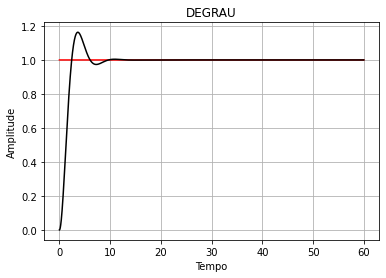


RESPOSTA À RAMPA:


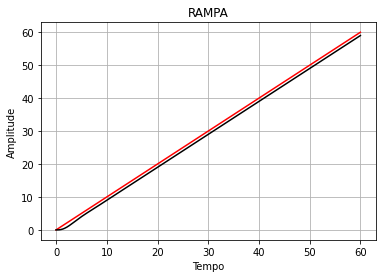


RESPOSTA À PARÁBOLA:


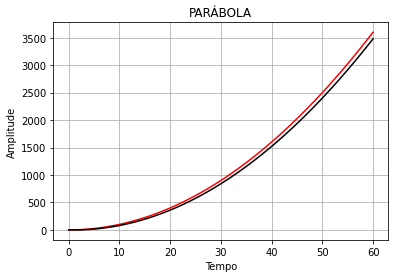

In [ ]:
#Definição da função para plot das respostas
def Resposta(t, y, sinal,title, xlabel, ylabel):
  plt.plot(t, sinal, 'red',)
  plt.plot(t, y, 'black',)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(0.5)
  plt.show()
  print()

#Plot da resposta ao Degrau
print('\033[1m'+'RESPOSTA AO DEGRAU'+'\033[0m:')
Resposta(tempo, y_d, u_degrau, 'DEGRAU','Tempo','Amplitude')

#Plot da resposta à Rampa
print('\033[1m'+'RESPOSTA À RAMPA'+'\033[0m:')
Resposta(tempo, y_r, u_rampa,'RAMPA','Tempo','Amplitude')

#Plot da resposta à Parábola
print('\033[1m'+'RESPOSTA À PARÁBOLA'+'\033[0m:')
Resposta(tempo, y_p, u_parabola,'PARÁBOLA','Tempo','Amplitude')

Nos plots apresentados acima temos que o sinal de entrada é representado pela curva em vermelho e a resposta do sistema representado pela curva em preto.

### Tipo do sistema

Podemos determinar o tipo do sistema partindo do seus polos, e ainda, seu tipo quanto sua estabilidade.

In [ ]:
autovalores = eigvals(A)                    #Os polos do sistema são os autovalores da matriz A
print('\033[1m'+'POLOS DO SISTEMA EM  MALHA ABERTA'+'\033[0m:\n')
print(autovalores)                          #O número de polos na origem pode ser usado para determinar o tipo do sistema

POLOS DO SISTEMA EM  MALHA ABERTA:

[-0.5+0.8660254j -0.5-0.8660254j]


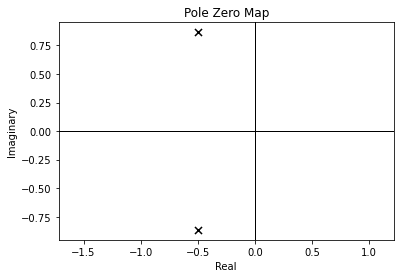

In [ ]:
plt.figure()
pzmap(system)
plt.show()

Uma vez que possuímos como polos do sistema um conjugado complexo presente no semiplano esquerdo é imediato que o mesmo é estável e do tipo 0.

### Critérios de desempenho

In [ ]:
print('\033[1m'+'CRITÉRIOS DE DESEMPENHO DO SISTEMA'+'\033[0m:\n')
ctr.step_info(system) #Critérios de desempenho do sistema

CRITÉRIOS DE DESEMPENHO DO SISTEMA:



{'RiseTime': 1.6746073403593058,
 'SettlingTime': 8.093935478403312,
 'SettlingMin': 0.9394891622475177,
 'SettlingMax': 1.1630334929041963,
 'Overshoot': 16.303349290419632,
 'Undershoot': 0,
 'Peak': 1.1630334929041963,
 'PeakTime': 3.628315904111829,
 'SteadyStateValue': 1.0}

Os valores apresentados acima representam os critérios de desempenho do sistema os quais também podem ser visualizados no plot $\textbf{Resposta ao Degrau}$ presente no tópico $\textbf{Simulação do modelo}$.

###Tempo de pico($t_s$):
O tempo de pico é definido como o instante onde ocorre o primeiro pico de $y(t)$. Para o nosso sistema temos que $t_p ≅ 3.63s$. Dessa forma, podemos calcular $y(t_p)$ que é o valor da resposta no tempo de pico e também o valor de regime do sistema, logo, temos que $y(t_p) ≅ 1.16$.

###Sobressinal Máximo($M_p$):

O valor de sobressinal ($\textit{Overshoot}$) é dado por meio da fórmula:

$$M_p = \frac{y(t_p) - y_{ss}}{y_{ss}} $$

Onde: $$y_{ss} = \lim_{t\rightarrow \infty} y(t)$$ Onde obtivemos o valor de $16.303$.

###Tempo de subida($t_r$):

Observando a resposta ao degrau e a saída do método, podemos admitir que o tempo de subida é $1.674s$.

###Tempo de acomodação($t_s$):

O tempo de acomodação é o tempo em que $y(t)$ leva para atingir $\pm 2\%$ ou $\pm 5\%$ de seu valor final. Temos que para o nosso sistema $t_s ≅ 8.093s$.

### Controlabilidade

A matriz de controlabilidade de um sistema qualquer é dada por:

\begin{equation}
\mathscr{C} = \begin{bmatrix} B & AB & A^2B & ... & A^{n-1}B \end{bmatrix}
\end{equation}

Temos que um sistema de ordem $n$ definido em E.E. é dito completamente controlável se $\mathscr{C}$ possui posto $n$(posto cheio). Dessa forma:

In [ ]:
#Matriz de Controlabilidade do sistema
CTR = ctrb(A,B)

print('\033[1m'+'MATRIZ DE CONTROLABILIDADE DO SISTEMA'+'\033[0m:\n')
print(CTR)

MATRIZ DE CONTROLABILIDADE DO SISTEMA:

[[ 1. -1.]
 [ 0.  1.]]


Teste de controlabilidade:

In [ ]:
print('\033[1m'+'POSTO DA MATRIZ DE CONTROLABILIDADE'+'\033[0m:\n')
print(matrix_rank(CTR))

POSTO DA MATRIZ DE CONTROLABILIDADE:

2


Portanto, uma vez que o sistema posssui ordem $n = 2$ e o método utilizado retornou $2$, podemos concluir que o sistema é $\textit{completamente controlável}$.

### Observabilidade

A matriz observabilidade de um sistema qualquer é dada por:

\begin{equation}
\mathcal{O} = \begin{bmatrix} C & CA & CA^2 & ... & CA^{n-1} \end{bmatrix}^{\top}
\end{equation}

Temos que um sistema de ordem $n$ definido em E.E. é dito completamente observável se $\mathcal{O}$ possui posto $n$(posto cheio). Dessa forma:

In [ ]:
#Matriz de Observabilidade do sistema
OBS = obsv(A,C)

print('\033[1m'+'MATRIZ DE OBSERVABILIDADE DO SISTEMA'+'\033[0m:\n')
print(OBS)

MATRIZ DE OBSERVABILIDADE DO SISTEMA:

[[0. 1.]
 [1. 0.]]


Teste de observabilidade

In [ ]:
print('\033[1m'+'POSTO DA MATRIZ DE OBSERVABILIDADE'+'\033[0m:\n')
print(matrix_rank(OBS))

POSTO DA MATRIZ DE OBSERVABILIDADE:

2


Portanto, uma vez que o sistema posssui ordem $n = 2$ e o método utilizado retornou $2$, podemos concluir que o sistema é $\textit{completamente observável}$.